In [ ]:
import re
import spacy
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
import string
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
## 2. Support Vector Machine
from sklearn.svm import SVC
## 3. Feed forward neural network or multi-layered perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# compute "goodness" of classification through accuracy
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head(10)

,Unnamed: 0,Date,category,title,content,Volume,label,sentiment,cleaned title
0,0,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,161940000,0,NaN,apple set beat q1 earnings estimate tech etf buy
1,1,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,161940000,0,NaN,tech daily intel result netflix surge apple va...
2,2,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,161940000,0,NaN,7 monster stock market prediction week january 27
3,3,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,161940000,0,NaN,apple earnings preview 5g launch expanding ser...
4,4,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,161940000,0,NaN,buy surging apple microsoft stock quarterly ea...
5,5,2020-01-27,opinion,Top Stock Analyst Reports For Merck Broadcom ...,Monday January 27 2020The Zacks Research Dai...,161940000,0,NaN,top stock analyst report merck broadcom sanofi
6,6,2020-01-27,news,Stocks Europe Seen Opening Lower as Virus Co...,By Peter Nurse \nInvesting com European stoc...,161940000,0,NaN,stock europe seen opening lower virus concern ...
7,7,2020-01-27,news,Intelligent Systems wins bullish rating from B...,BTIG analyst Mark Palmer initiates coverage of...,161940000,0,NaN,intelligent system win bullish rating btig app...
8,8,2020-01-24,opinion,What To Do If A Stock On Your Buy List Has A...,I got a great question recently from Barbara P...,146537600,0,NaN,stock buy list already run 100
9,9,2020-01-24,opinion,Previewing Tech Sector Earnings,We get into the heart of the Q4 earnings seaso...,146537600,0,NaN,previewing tech sector earnings


In [ ]:
positive_words_file = "positive-words.txt"
positive_words = []
with open(positive_words_file, "r") as file:
    positive_words = file.readlines()
positive_words = set([word.strip() for word in positive_words])



negative_words_file = "negative-words.txt"
negative_words = []
with open(negative_words_file, "r") as file:
    negative_words = file.readlines()
negative_words = set([word.strip() for word in negative_words])


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

words = positive_words.union(negative_words)
vectorizer = CountVectorizer(vocabulary=words, lowercase=True)

# Function to calculate sentiment score for a headline
def calculate_sentiment_score(headline):
    tokens = word_tokenize(headline.lower())
    token_counts = vectorizer.transform([' '.join(tokens)]).toarray()[0]
    positive_count = sum(token_counts[:len(positive_words)])
    negative_count = sum(token_counts[len(positive_words):])
    if positive_count >= negative_count:
      return 'positive'
    else:
      return 'negative'


# Apply sentiment analysis to each headline
df['sentiment'] = df['cleaned title'].apply(calculate_sentiment_score)



In [ ]:
df.head()

,Unnamed: 0,Date,category,title,content,Volume,label,sentiment,cleaned title
0,0,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,161940000,0,positive,apple set beat q1 earnings estimate tech etf buy
1,1,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,161940000,0,positive,tech daily intel result netflix surge apple va...
2,2,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,161940000,0,negative,7 monster stock market prediction week january 27
3,3,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,161940000,0,positive,apple earnings preview 5g launch expanding ser...
4,4,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,161940000,0,positive,buy surging apple microsoft stock quarterly ea...


In [ ]:
df['sentiment'].value_counts()

sentiment
positive    10529
negative     5446
Name: count, dtype: int64

In [ ]:
columns = df.columns
print(columns)

Index(['Unnamed: 0', 'Date', 'category', 'title', 'content', 'Volume', 'label',
       'sentiment', 'cleaned title'],
      dtype='object')


In [ ]:
encoded_df = pd.DataFrame()
encoded_df['category'] = df['category'].apply(lambda x: 1 if x == 'news' else 0)
encoded_df['volume'] = df['Volume']
df['Date'] = pd.to_datetime(df['Date'])
encoded_df['year'] = df['Date'].dt.year
encoded_df['month'] = df['Date'].dt.month
encoded_df['day'] = df['Date'].dt.day
encoded_df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
encoded_df['label'] = df['label']


In [ ]:
encoded_df.head(25)

,category,volume,year,month,day,sentiment,label
0,0,161940000,2020,1,27,1,0
1,0,161940000,2020,1,27,1,0
2,0,161940000,2020,1,27,0,0
3,0,161940000,2020,1,27,1,0
4,0,161940000,2020,1,27,1,0
5,0,161940000,2020,1,27,0,0
6,1,161940000,2020,1,27,1,0
7,1,161940000,2020,1,27,0,0
8,0,146537600,2020,1,24,1,0
9,0,146537600,2020,1,24,1,0


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X = encoded_df[['category', 'volume','year', 'month', 'day', 'sentiment']]  # Features
y = encoded_df['label']                                # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)


In [ ]:
# logistic regression
classifier_lr = LogisticRegression(max_iter=10000000)

classifier_lr.fit(X_train, y_train)

y_pred = classifier_lr.predict(X_test)

#Calculate accuracy of model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression = {accuracy_lr*100}%")

Accuracy of Logistic Regression = 55.305164319248824%


In [ ]:
# SVC

classifier_svc = SVC(max_iter=1000)

classifier_svc.fit(X_train, y_train)

y_pred = classifier_svc.predict(X_test)

accuracy_svc = accuracy_score(y_test,y_pred)
print(f"Accuracy of Support Vector Classification = {accuracy_svc*100}%")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of Support Vector Classification = 55.89984350547731%


In [ ]:
# Feed Forward Network

classifier_ffn = MLPClassifier(max_iter=1000)

classifier_ffn.fit(X_train,y_train)

y_pred = classifier_ffn.predict(X_test)

# Calculate the accuracy of model
accuracy_ffn =ffn = accuracy_score(y_test, y_pred)
print(f"Accuracy of Feed Forward Network = {accuracy_ffn*100}%")

Accuracy of Feed Forward Network = 44.69483568075117%


In [ ]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
classifier_rf = RandomForestClassifier()

# Fit the model on the training data
classifier_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier = {accuracy_rf*100}%")

Accuracy of Random Forest Classifier = 97.4960876369327%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest Classifier
classifier_rf = RandomForestClassifier()

# Fit the model on the training data
classifier_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_rf.predict(X_test)

# Generate the classification report
report_rf = classification_report(y_test, y_pred)
print("Classification Report for Random Forest Classifier:")
print(report_rf)


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1428
           1       0.97      0.98      0.98      1767

    accuracy                           0.97      3195
   macro avg       0.97      0.97      0.97      3195
weighted avg       0.97      0.97      0.97      3195



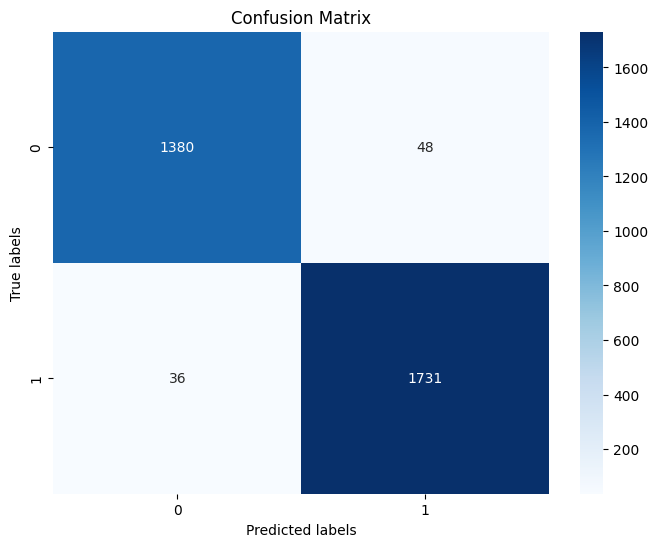

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred are your true and predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9769792251544076
Recall: 0.9847198641765704
F1 Score: 0.9808342728297633


In [ ]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier
classifier_gbm = GradientBoostingClassifier()

# Fit the model on the training data
classifier_gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_gbm.predict(X_test)

# Calculate the accuracy of the model
accuracy_gbm = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Classifier = {accuracy_gbm*100}%")

Accuracy of Gradient Boosting Classifier = 77.62128325508607%


In [ ]:
report_gbm = classification_report(y_test, y_pred)
print("Classification Report for GBM Classifier:")
print(report_gbm)

Classification Report for GBM Classifier:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1428
           1       0.77      0.84      0.81      1767

    accuracy                           0.78      3195
   macro avg       0.78      0.77      0.77      3195
weighted avg       0.78      0.78      0.77      3195



In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.773104880581516
Recall: 0.842671194114318
F1 Score: 0.8063904684538316


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost Classifier
classifier_xgb = XGBClassifier()

# Fit the model on the training data
classifier_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_xgb.predict(X_test)

# Calculate the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost Classifier = {accuracy_xgb*100}%")

Accuracy of XGBoost Classifier = 97.68388106416276%


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9742296918767507
Recall: 0.9841539332201471
F1 Score: 0.9791666666666666


In [ ]:
report_xgb = classification_report(y_test, y_pred)
print("Classification Report for XGB Classifier:")
print(report_xgb)

Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1428
           1       0.97      0.98      0.98      1767

    accuracy                           0.98      3195
   macro avg       0.98      0.98      0.98      3195
weighted avg       0.98      0.98      0.98      3195



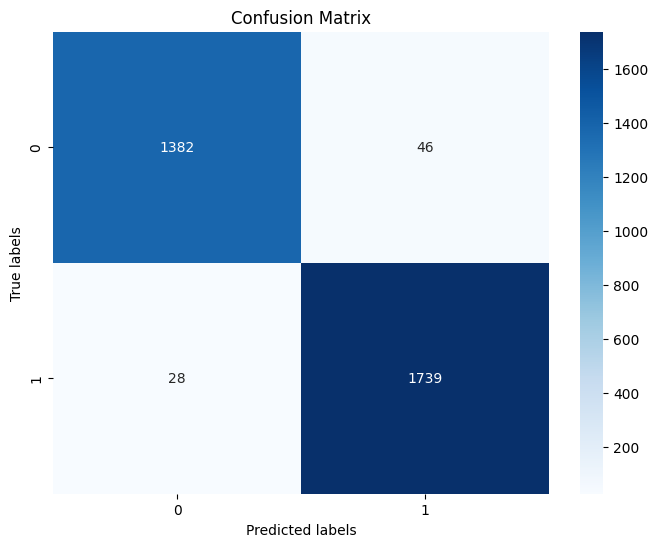

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Here, the XGBoost was the best model at predicting whether a stock was a buy or sell, and the random forest was pretty close too.